ModuleNotFoundError: No module named 'imageio'

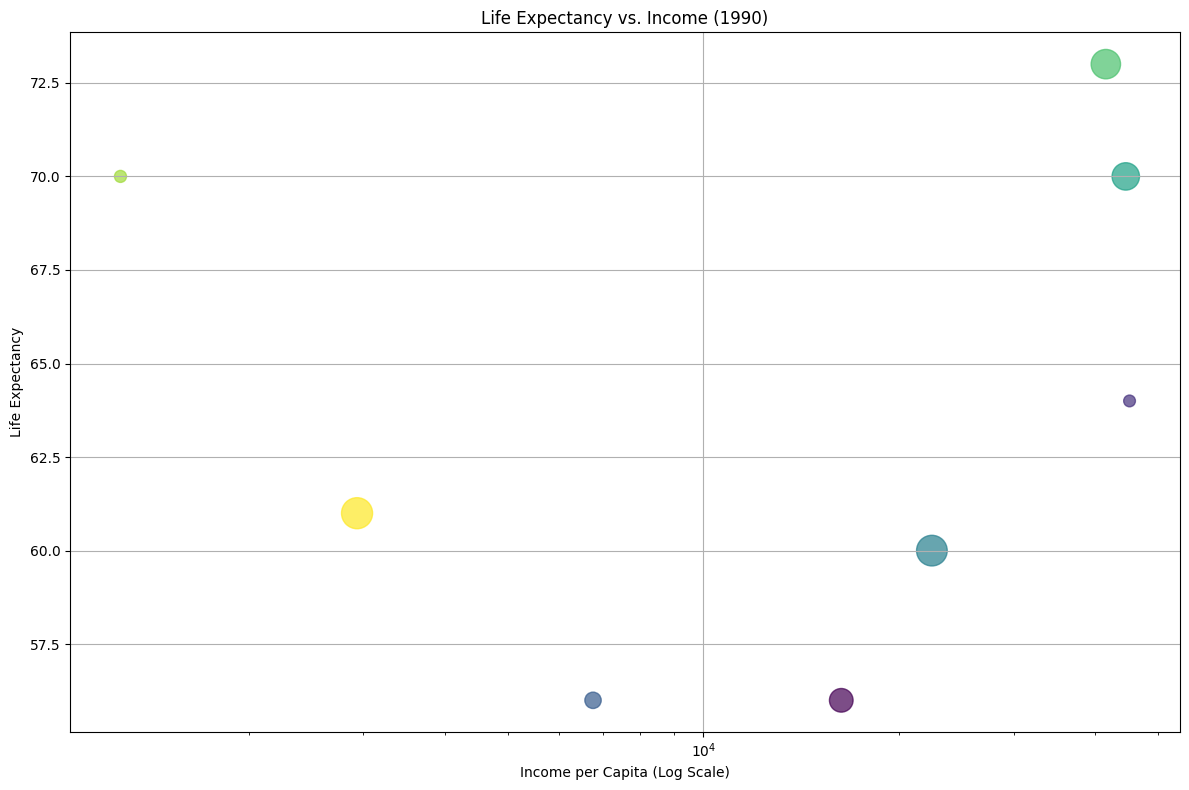

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
import numpy as np  

np.random.seed(42)
n_countries = 8
years = range(1990, 2021, 5)  

data = {
    'Year': [],
    'Country': [],
    'Life Expectancy': [],
    'Income': [],
    'Population': []
}

for year in years:
    for i in range(n_countries):
        country = f"Country {i+1}"
        life_expectancy = np.random.randint(50 + (year - 1990) * 0.5, 75 + (year - 1990) * 0.4)  
        income = np.random.randint(500 + (year - 1990) * 50, 50000 + (year - 1990) * 200)       
        population = np.random.randint(1000000, 100000000)
        data['Year'].append(year)
        data['Country'].append(country)
        data['Life Expectancy'].append(life_expectancy)
        data['Income'].append(income)
        data['Population'].append(population)

df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(12, 8))

def animate(i):
    year = years[i]
    df_year = df[df['Year'] == year]

    ax.clear()  

    population_size = (df_year['Population'] / df_year['Population'].max()) * 500 

    scatter = ax.scatter(df_year['Income'], df_year['Life Expectancy'], s=population_size, alpha=0.7, c=df_year.index, cmap='viridis')

    ax.set_xlabel('Income per Capita (Log Scale)')
    ax.set_ylabel('Life Expectancy')
    ax.set_title(f'Life Expectancy vs. Income ({year})')
    ax.set_xscale('log')
    ax.grid(True)
    fig.tight_layout()

    return scatter, 

ani = animation.FuncAnimation(fig, animate, frames=len(years), interval=500, blit=False, repeat=False) 

import imageio  
ani.save('hans_rosling_animation.gif', writer='pillow', fps=2) 
print("Animation saved as hans_rosling_animation.gif")
print("imageio not found. Install it to save as GIF (pip install imageio).")

plt.show()